/content/drive/MyDrive/assignment1/cam/photo0.jpg
1 faces detected in the image.


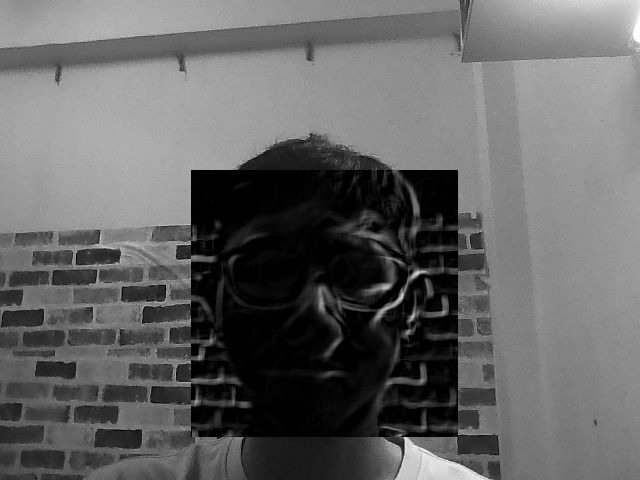

/content/drive/MyDrive/assignment1/cam/photo1.jpg
1 faces detected in the image.


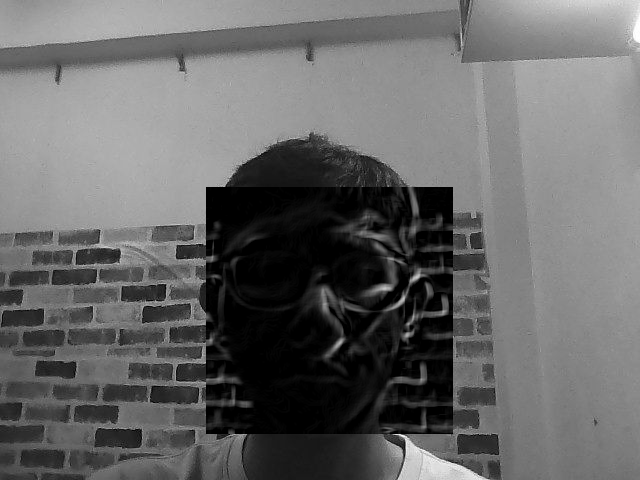

/content/drive/MyDrive/assignment1/cam/photo2.jpg
1 faces detected in the image.


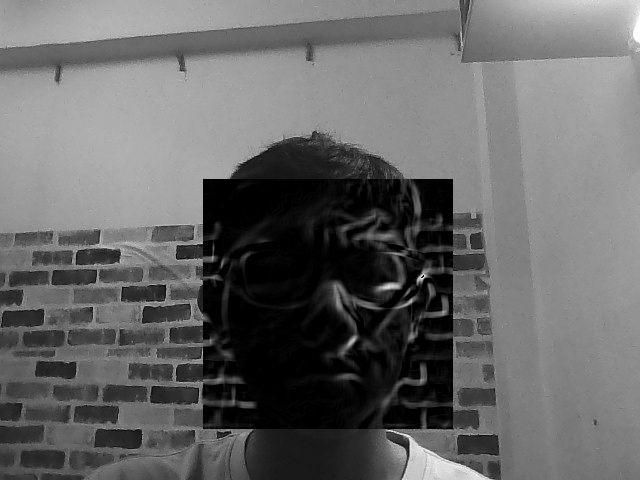

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

source_dir = "/content/drive/MyDrive/assignment1/cam/"
outSobel_dir = "/content/drive/MyDrive/assignment1/sobel/"
outCanny_dir = "/content/drive/MyDrive/assignment1/canny/"

filenames = os.listdir(source_dir) 

for filename in filenames:
  print(source_dir + filename)
  img = cv2.imread(source_dir+ filename,1)
  grayImage = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

  # detect all the faces in the image
  faces = face_cascade.detectMultiScale(grayImage,1.1,4)
  # print the number of faces detected
  print(f"{len(faces)} faces detected in the image.")

  # for every face, draw a green rectangle
  for x, y, w, h in faces:
    face_roi = grayImage[y:y + h, x:x + w]
    blurred = cv2.GaussianBlur(face_roi,(7,7),5)

    #sobel
    sobelx = cv2.Sobel(blurred, cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_8U,0,1,ksize=3)
    sobel = sobelx + sobely

    grayImage[y:y+h, x:x+w] = sobel

  cv2_imshow(grayImage)
  # save the image with rectangles
  cv2.imwrite(outSobel_dir + "sobel_" + filename , grayImage)

/content/drive/MyDrive/assignment1/cam/photo0.jpg
1 faces detected in the image.


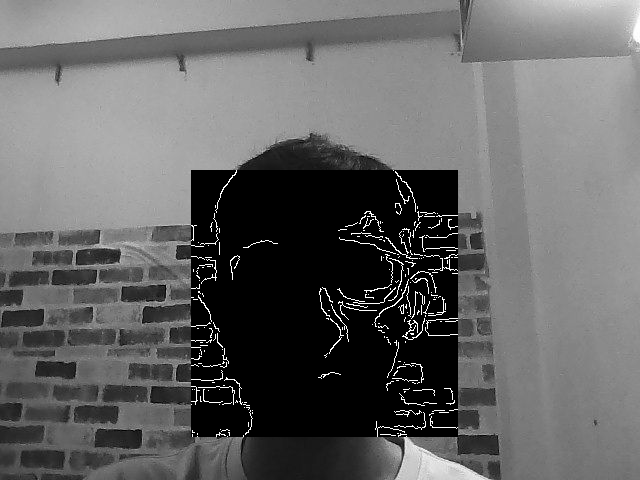

/content/drive/MyDrive/assignment1/cam/photo1.jpg
1 faces detected in the image.


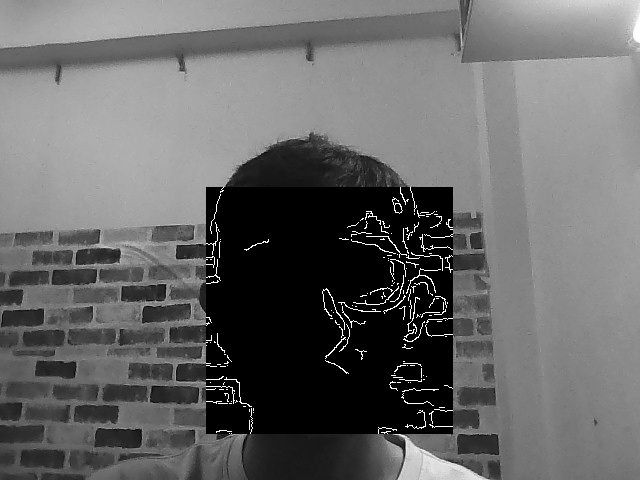

/content/drive/MyDrive/assignment1/cam/photo2.jpg
1 faces detected in the image.


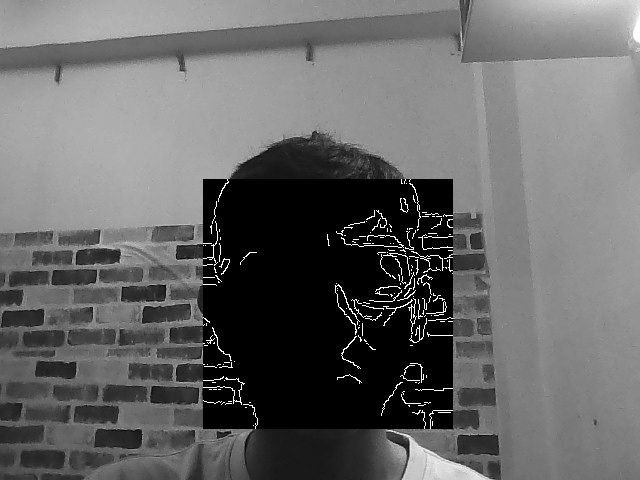

In [ ]:
for filename in filenames:
  print(source_dir + filename)
  img = cv2.imread(source_dir+ filename,1)
  grayImage = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

  # detect all the faces in the image
  faces = face_cascade.detectMultiScale(grayImage,1.1,4)
  # print the number of faces detected
  print(f"{len(faces)} faces detected in the image.")

  # for every face, draw a green rectangle
  for x, y, w, h in faces:
    face_roi = grayImage[y:y + h, x:x + w]
    blurred = cv2.GaussianBlur(face_roi,(7,7),5)

    #canny
    canny = cv2.Canny(blurred,20,70)

    grayImage[y:y+h, x:x+w] = canny

  cv2_imshow(grayImage)
  # save the image with rectangles
  cv2.imwrite(outCanny_dir + "canny_" + filename , grayImage)